# Problem Set 1, due April 12th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
%matplotlib inline
print ("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       4.2.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.17.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Maplotlib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version:   0.18 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Peter Lu*
- *Coulter L'Heureux*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [4]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['DESCR', 'target', 'data', 'feature_names'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target
print (boston.shape)

(506, 14)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
#1.1.1: 
print (len(boston.columns))
print (len(boston.index))

#1.1.2:
print (len(boston.loc[boston['CHAS'] == 1]))

#1.1.3:
print (boston.isnull().values.ravel().sum())

#1.1.4:
print (boston.sort_values('MEDV', ascending=False).head(5))

14
506
35
0
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
283  0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
225  0.52693   0.0   6.20   0.0  0.504  8.725   83.0  2.8944   8.0  307.0   
369  5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370  6.53876   0.0  18.10   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
283     13.6  395.52   3.16  50.0  
225     17.4  382.00   4.63  50.0  
369     20.2  375.33   3.73  50.0  
370     20.2  392.05   2.96  50.0  
371     20.2  366.15   9.53  50.0  


*Provide our answers below:*

 - 1.1.1: *14 Variables, 506 observations*
 - 1.1.2: *35 instances are neighborhoods where the tract bounds the Charles River*
 - 1.1.3: *No Missing Values*
 - 1.1.4: *198, 307, 666, 666, 666*

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
# 1.2.1:
print()
print (boston[['MEDV']].sort_values('MEDV', ascending=False).head(1))

#1.2.2:
print (len(boston.loc[boston['RM'] < 5]))

#1.2.3:
print (boston.loc[boston['CHAS'] == 1].sort_values(by=('TAX'), ascending=False).head(1))

#1.2.4:
print()
print (boston[['CRIM', 'MEDV']].sort_values(by=('MEDV'), ascending=False).head(1))

#1.2.5
print()
print (boston[['CRIM', 'MEDV']].sort_values(by=('MEDV'), ascending=True).head(1))


     MEDV
283  50.0
15
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
372  8.26725  0.0   18.1   1.0  0.668  5.875  89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
372     20.2  347.88   8.88  50.0  

        CRIM  MEDV
283  0.01501  50.0

        CRIM  MEDV
398  38.3518   5.0


*Provide our answers below:*

 - 1.2.1: *50000 dollars is the is the median housing price in Boston's most expensive neighborhood*
 - 1.2.2: *15 neighborhoods have, on average, less than 5 rooms per dwelling*
 - 1.2.3: *666 dollars is the property tax in the most expensive neighborhood adjacent to the Charles River*
 - 1.2.4: *The per capita crime rate by town was 0.01501 for the highest median housing price (50,000 dollars)*
 - 1.2.5: *The per capita crime rate by town was 38.3518 for the lowest median housing price (5,000 dollars)*

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
# Creating Table
cols = (boston.columns).tolist()

firstCol = [ len(boston[x]) for x in cols ]  # I love List Comprehensions
secondCol = [ round(boston[x].mean(), 2) for x in cols]
thirdCol = [ round(boston[x].std(), 2) for x in cols]
fourthCol = [ round(boston[x].min(),2) for x in cols]
fifthCol = [ round(boston[x].median(),2) for x in cols]
sixthCol = [ round(boston[x].max(),2) for x in cols]

#rowsAsCols = np.column_stack(([ round(elem, 2) for elem in firstRow ], [ round(elem, 2) for elem in secondRow ], [ round(elem, 2) for elem in thirdRow ], [ round(elem, 2) for elem in fourthRow ], [ round(elem, 2) for elem in fifthRow ], [ round(elem, 2) for elem in sixthRow ]))

#print (firstRow)
#print (secondRow)
#print (thirdRow)
#print (fourthRow)
#print (fifthRow)
#print (sixthRow)


index = ['Name', 'Number of Non-Missing Values', 'Mean', 'Standard Deviation', 'Min', 'Median', 'Max']

# Create DataFrame and insert lists as columns

table = pd.DataFrame({'Name': cols, 'Number of Non-Missing Values': firstCol, 'Mean': secondCol, 'Standard Deviation': thirdCol, 'Min': fourthCol, 'Median': fifthCol, 'Max':sixthCol})

# Set Index to be at 1
table.index += 1

# Reorder columns to adhere to required format
table = table[index]

table
#table.loc['Number of Non-Missing Values'] = pd.Series(dict(zip(cols, firstCol)))


Name  Number of Non-Missing Values    Mean  Standard Deviation     Min  \
1      CRIM                           506    3.59                8.60    0.01   
2        ZN                           506   11.36               23.32    0.00   
3     INDUS                           506   11.14                6.86    0.46   
4      CHAS                           506    0.07                0.25    0.00   
5       NOX                           506    0.55                0.12    0.38   
6        RM                           506    6.28                0.70    3.56   
7       AGE                           506   68.57               28.15    2.90   
8       DIS                           506    3.80                2.11    1.13   
9       RAD                           506    9.55                8.71    1.00   
10      TAX                           506  408.24              168.54  187.00   
11  PTRATIO                           506   18.46                2.16   12.60   
12        B                           506  356.67               91.29    0.32   
13    LSTAT                           506   12.65                7.14    1.73   
14     MEDV                           506   22.53                9.20    5.00   

    Median     Max  
1     0.26   88.98  
2     0.00  100.00  
3     9.69   27.74  
4     0.00    1.00  
5     0.54    0.87  
6     6.21    8.78  
7    77.50  100.00  
8     3.21   12.13  
9     5.00   24.00  
10  330.00  711.00  
11   19.05   22.00  
12  391.44  396.90  
13   11.36   37.97  
14   21.20   50.00

### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
# From Here: http://stackoverflow.com/questions/13404468/t-test-in-pandas-python
from scipy.stats import ttest_ind


CharlesPresent = boston[boston['CHAS']==1]
#print (CharlesPresent)
CharlesAbsent = boston[boston['CHAS']==0]
#print (CharlesAbsent)

ttest_ind(CharlesPresent['MEDV'], CharlesAbsent['MEDV'])

Ttest_indResult(statistic=3.9964374660905091, pvalue=7.3906231705199048e-05)

Because the pvalue is significantly less than 0.05, being 0.000073906231705199048, we must reject the null hypothesis and conclude that there was a significant difference does exist.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


/home/kriarvi95/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


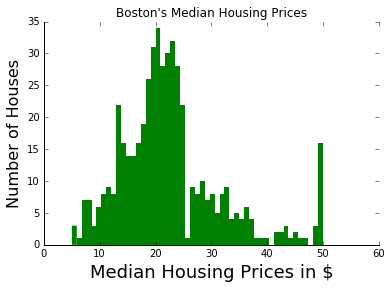

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

data = bdata.target

# edit the code below to make the graph look good
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hist(data, color = 'g', edgecolor = "none", bins=51)
plt.title("Boston's Median Housing Prices")
plt.xlabel('Median Housing Prices in $', fontsize=18)
plt.ylabel('Number of Houses', fontsize=16)
plt.legend()
plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


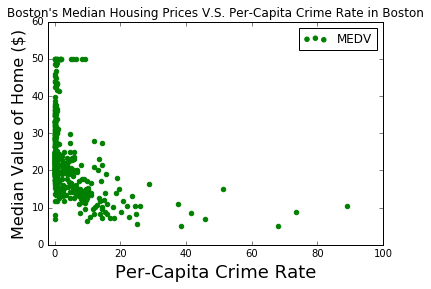

Correlation of Median Housing and Per-Capita Crime:  -0.385831689884


In [11]:
plt.scatter(boston['CRIM'], boston['MEDV'], color='g')
plt.title("Boston's Median Housing Prices V.S. Per-Capita Crime Rate in Boston")
plt.xlabel('Per-Capita Crime Rate', fontsize=18)
plt.ylabel('Median Value of Home ($)', fontsize=16)
plt.xlim(-2,100)
plt.legend()
plt.show()

print("Correlation of Median Housing and Per-Capita Crime: ", np.corrcoef(boston['CRIM'],boston['MEDV'])[1,0])

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

From a cursory glance, we can see that higher median housing prices have a fewer per-capita crime rate; median values of $50,000 have under 20%. We can can tell from our correlation coefficient that there is a weak negative correlation, the value is ~0.39. However, it is insufficent to draw a causal link from just this because although it would be convenient to say that higher Per-Capita Crime Rate is *caused by* the disparaties of housing prices there may be hidden, alternative explanations such as education or ease of access to fire-arms or lack of just law enforcement that is actually causing this issue. 

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear dark green and large negative correlations appear a lighter shade of green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

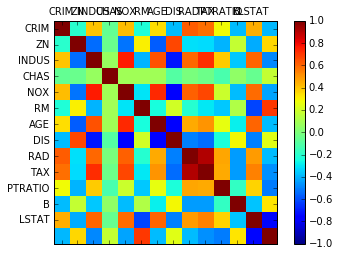

In [12]:
CM = boston.corr()

# From: http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(CM, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(bdata.feature_names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bdata.feature_names)
ax.set_yticklabels(bdata.feature_names)

#From: http://matplotlib.org/users/image_tutorial.html
plt.set_cmap('Greens')
plt.show()

Obviously, there is a high postive correlation between the same variable. Other than that, there is a high positive correlation between LSTAT (% lower status of the population) and RM (average number of rooms per dwelling), TAX (full-value property-tax rate per $10,000) and INDUS (proportion of non-retail business acres per town), and TAX and RAD (index of accessibility to radial highways ).

There are also high negative correlations between DIS (weighted distances to five Boston employment centres) and INDUS,DIS and NOX (nitric oxides concentration (parts per 10 million)), DIS and AGE (proportion of owner-occupied units built prior to 1940), LSTAT and RM, and LSTAT and B (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town).

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

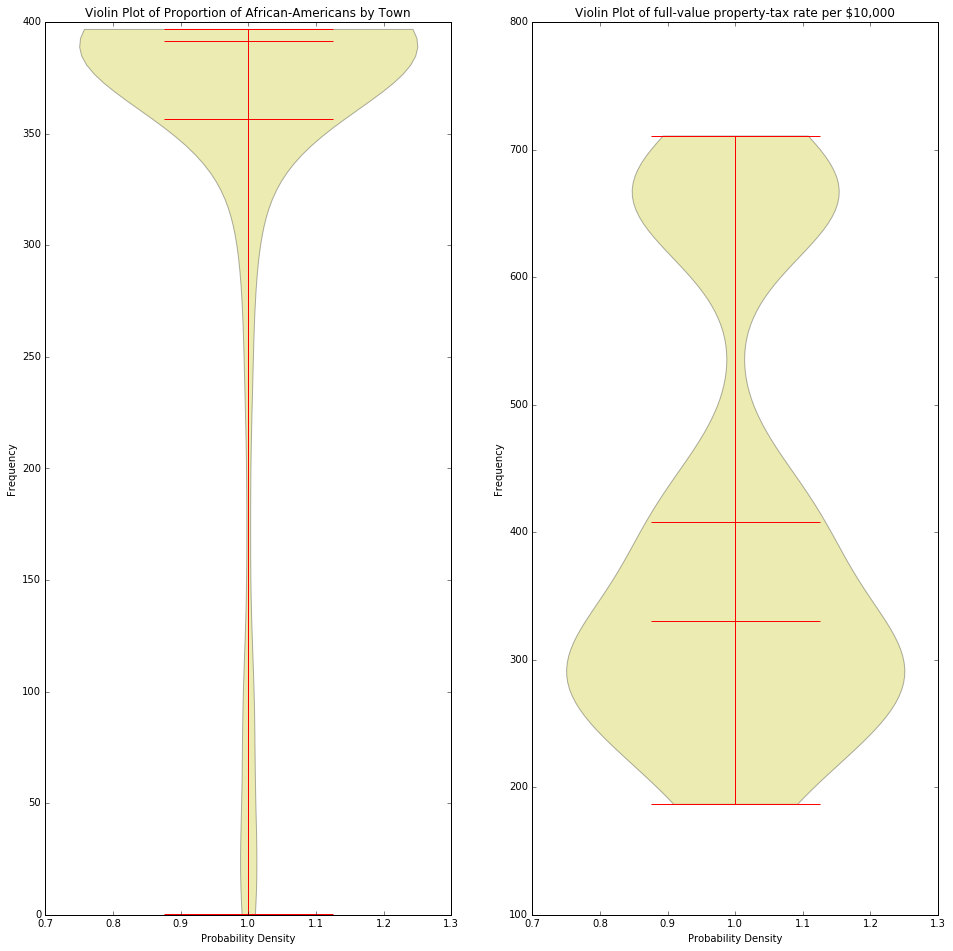

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

axes[0].violinplot(boston['B'], showextrema=True, showmeans=True, showmedians=True, bw_method='silverman')
axes[0].set_title('Violin Plot of Proportion of African-Americans by Town')
axes[0].set_xlabel('Probability Density')
axes[0].set_ylabel('Frequency')

axes[1].violinplot(boston['TAX'], showextrema=True, showmeans=True, showmedians=True, bw_method='silverman')
axes[1].set_title('Violin Plot of full-value property-tax rate per $10,000')
axes[1].set_xlabel('Probability Density')
axes[1].set_ylabel('Frequency')